## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Different architecture over the MNIST  dataset
## 1st Architecture 

##### Using BatchNormalization

In [41]:
# Multilayer perceptron
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_42 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                2570      
Total params: 271,370
Trainable params: 270,346
Non-trainable params: 1,024
_________________________________________________________________


In [42]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.2127 - acc: 0.9362 - val_loss: 0.1209 - val_acc: 0.9640
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0838 - acc: 0.9755 - val_loss: 0.0880 - val_acc: 0.9730
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0569 - acc: 0.9828 - val_loss: 0.0838 - val_acc: 0.9736
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0409 - acc: 0.9877 - val_loss: 0.0914 - val_acc: 0.9711
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0305 - acc: 0.9909 - val_loss: 0.0858 - val_acc: 0.9741
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0247 - acc: 0.9923 - val_loss: 0.0862 - val_acc: 0.9747
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0183 - acc: 0.9942 - val_loss: 0.0770 - val_acc

Test score: 0.11059680169939529
Test accuracy: 0.9757


<IPython.core.display.Javascript object>


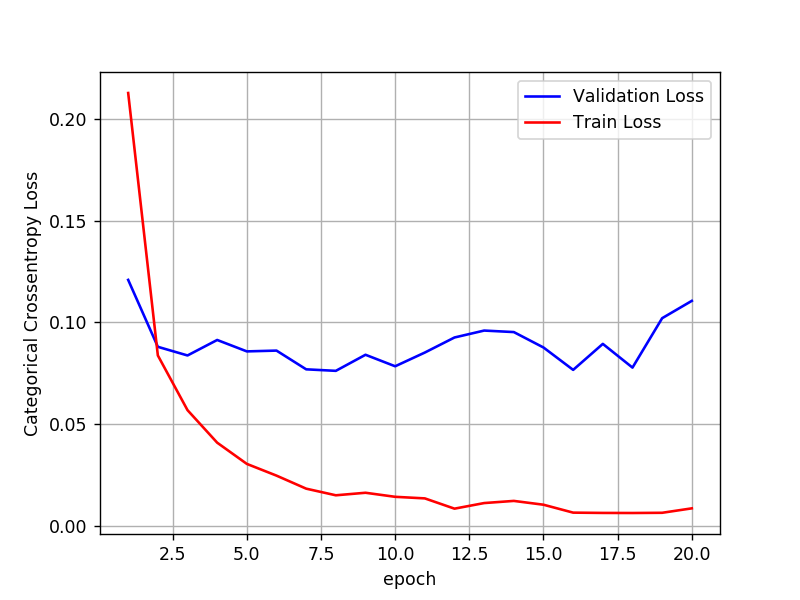

In [43]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##### Using Dropout rate = .5

In [48]:
# Multilayer perceptron
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_batch = Sequential()

model_batch.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(Dropout(.5))

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(Dropout(.5))

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
dense_53 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 10)                2570      
Total params: 270,346
Trainable params: 269,834
Non-trainable params: 512
_________________________________________________________________


In [49]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 1.1720 - acc: 0.8553 - val_loss: 0.2984 - val_acc: 0.9518
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.3732 - acc: 0.9302 - val_loss: 0.1951 - val_acc: 0.9596
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.2273 - acc: 0.9465 - val_loss: 0.1320 - val_acc: 0.9671
Epoch 4/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1545 - acc: 0.9581 - val_loss: 0.1178 - val_acc: 0.9686
Epoch 5/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1270 - acc: 0.9635 - val_loss: 0.0974 - val_acc: 0.9738
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1070 - acc: 0.9680 - val_loss: 0.0914 - val_acc: 0.9741
Epoch 7/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0932 - acc: 0.9717 - val_loss: 0.0944 - val_acc

Test score: 0.09127562351424058
Test accuracy: 0.9791


<IPython.core.display.Javascript object>


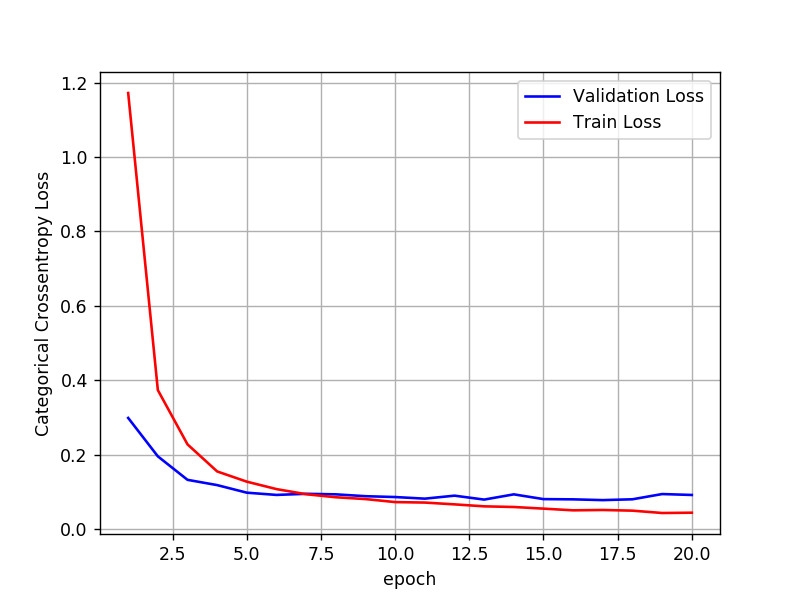

In [50]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')  
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### for dropout rate = .25

In [74]:
# Multilayer perceptron
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_batch = Sequential()

model_batch.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(Dropout(.25))

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(Dropout(.25))

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [75]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.3999 - acc: 0.8791 - val_loss: 0.1476 - val_acc: 0.9556
Epoch 2/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1841 - acc: 0.9447 - val_loss: 0.1029 - val_acc: 0.9695
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1441 - acc: 0.9557 - val_loss: 0.0919 - val_acc: 0.9720
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1212 - acc: 0.9629 - val_loss: 0.0947 - val_acc: 0.9714
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1025 - acc: 0.9684 - val_loss: 0.0833 - val_acc: 0.9764
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0937 - acc: 0.9707 - val_loss: 0.0756 - val_acc: 0.9786
Epoch 7/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0840 - acc: 0.9725 - val_loss: 0.0705 - val_acc

Test score: 0.07188854937002025
Test accuracy: 0.9818


<IPython.core.display.Javascript object>


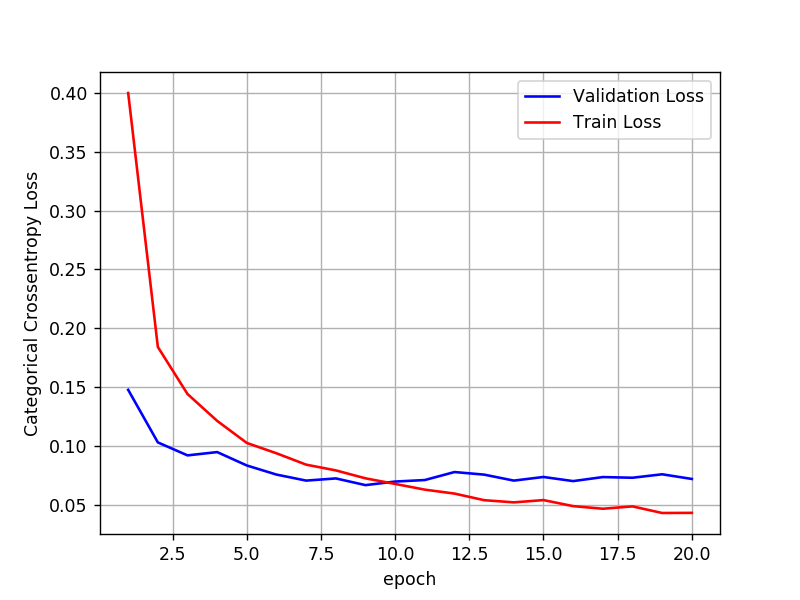

In [76]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')  
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 2nd  architecture with three layers

In [55]:
model_batch = Sequential()

# 1st layer

model_batch.add(Dense(512,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0,stddev = .039,seed= None)))
model_batch.add(Dropout(.5))

# 2nd layer
model_batch.add(Dense(256,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(Dropout(.5))

# 3rd layer

model_batch.add(Dense(128,activation = 'relu',input_shape = (input_dim,), kernel_initializer = RandomNormal(mean = 0.0,stddev = .039,seed = None)))
model_batch.add(Dropout(.5))


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                1290      
Total para

In [56]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.4864 - acc: 0.8500 - val_loss: 0.1532 - val_acc: 0.9534
Epoch 2/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.2080 - acc: 0.9410 - val_loss: 0.1159 - val_acc: 0.9651
Epoch 3/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.1654 - acc: 0.9527 - val_loss: 0.0960 - val_acc: 0.9706
Epoch 4/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1390 - acc: 0.9609 - val_loss: 0.0833 - val_acc: 0.9749
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1240 - acc: 0.9653 - val_loss: 0.0785 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.1102 - acc: 0.9688 - val_loss: 0.0762 - val_acc: 0.9773
Epoch 7/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1035 - acc: 0.9712 - val_loss: 0.0747 - 

Test score: 0.0699391692055482
Test accuracy: 0.9823


<IPython.core.display.Javascript object>


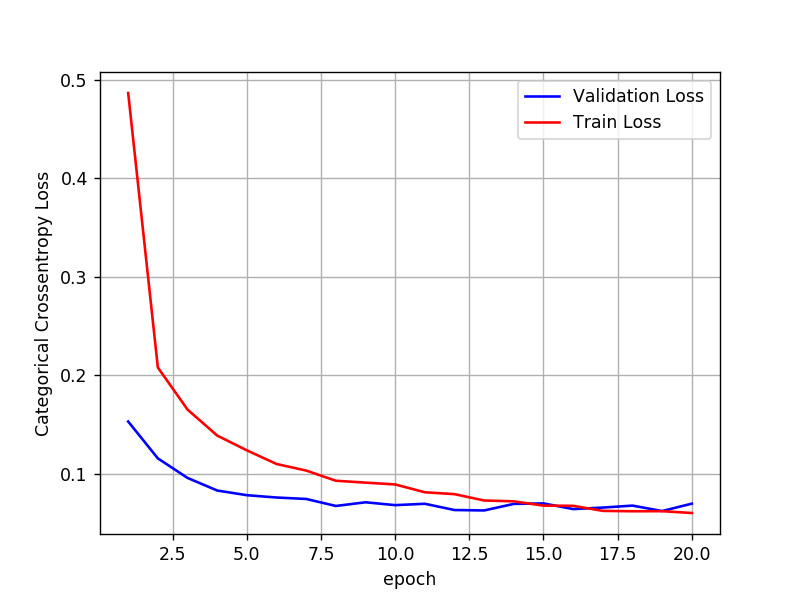

In [57]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')  
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### drop out rate = .25

In [77]:
model_batch = Sequential()

# 1st layer

model_batch.add(Dense(512,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0,stddev = .039,seed= None)))
model_batch.add(Dropout(.25))

# 2nd layer
model_batch.add(Dense(256,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(Dropout(.25))

# 3rd layer

model_batch.add(Dense(128,activation = 'relu',input_shape = (input_dim,), kernel_initializer = RandomNormal(mean = 0.0,stddev = .039,seed = None)))
model_batch.add(Dropout(.25))


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 10)                1290      
Total para

In [78]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.3181 - acc: 0.9049 - val_loss: 0.1163 - val_acc: 0.9647
Epoch 2/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.1294 - acc: 0.9617 - val_loss: 0.0797 - val_acc: 0.9764
Epoch 3/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0943 - acc: 0.9721 - val_loss: 0.0786 - val_acc: 0.9770
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0756 - acc: 0.9776 - val_loss: 0.0655 - val_acc: 0.9800
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0633 - acc: 0.9808 - val_loss: 0.0780 - val_acc: 0.9779
Epoch 6/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0560 - acc: 0.9835 - val_loss: 0.0694 - val_acc: 0.9807
Epoch 7/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.0520 - acc: 0.9842 - val_loss: 0.0635 -

Test score: 0.07066281900118729
Test accuracy: 0.9833


c:\users\karan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


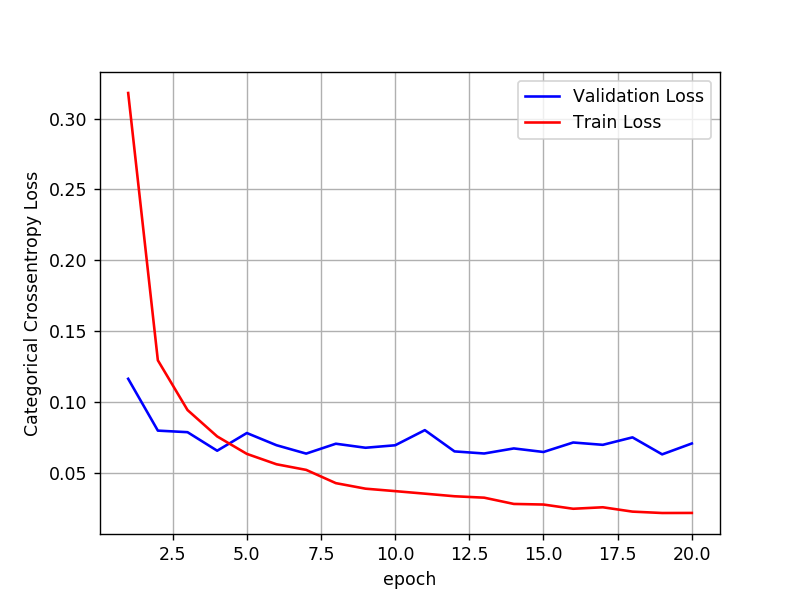

In [79]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')  
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### using batch normalization

In [65]:
model_batch = Sequential()
from keras.layers.normalization import BatchNormalization
# 1st layer

model_batch.add(Dense(512,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0,stddev = .039,seed= None)))
model_batch.add(BatchNormalization())

# 2nd layer
model_batch.add(Dense(256,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(BatchNormalization())

# 3rd layer

model_batch.add(Dense(128,activation = 'relu',input_shape = (input_dim,), kernel_initializer = RandomNormal(mean = 0.0,stddev = .039,seed = None)))
model_batch.add(BatchNormalization())


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dense_71 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_15 (Batc (None, 256)               1024      
_________________________________________________________________
dense_72 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
dense_73 (Dense)             (None, 10)                1290      
Total para

In [66]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.1766 - acc: 0.9464 - val_loss: 0.0937 - val_acc: 0.9697
Epoch 2/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0756 - acc: 0.9760 - val_loss: 0.0807 - val_acc: 0.9739
Epoch 3/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.0534 - acc: 0.9821 - val_loss: 0.0875 - val_acc: 0.9719
Epoch 4/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0404 - acc: 0.9870 - val_loss: 0.0796 - val_acc: 0.9734
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0320 - acc: 0.9895 - val_loss: 0.0905 - val_acc: 0.9719
Epoch 6/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.0281 - acc: 0.9905 - val_loss: 0.0768 - val_acc: 0.9784
Epoch 7/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0260 - acc: 0.9913 - val_loss: 0.0833 -

Test score: 0.07659351575362161
Test accuracy: 0.9816


<IPython.core.display.Javascript object>


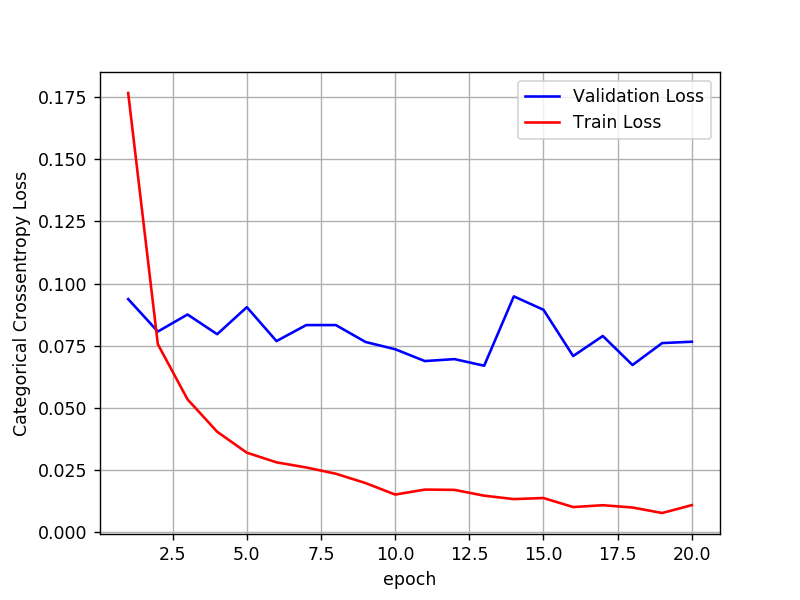

In [67]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')  
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 3rd Architecture

In [68]:
model_batch = Sequential()
from keras.layers.normalization import BatchNormalization
# 1st layer

model_batch.add(Dense(512,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0,stddev = .039,seed= None)))
model_batch.add(BatchNormalization())

# 2nd layer
model_batch.add(Dense(256,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(BatchNormalization())

#3rd layer
model_batch.add(Dense(128,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(BatchNormalization())

# 4th layer

model_batch.add(Dense(128,activation = 'relu',input_shape = (input_dim,), kernel_initializer = RandomNormal(mean = 0.0,stddev = .039,seed = None)))
model_batch.add(BatchNormalization())

#5th layer

model_batch.add(Dense(56,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dense_75 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_18 (Batc (None, 256)               1024      
_________________________________________________________________
dense_76 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_19 (Batc (None, 128)               512       
_________________________________________________________________
dense_77 (Dense)             (None, 128)               16512     
__________

In [69]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.2149 - acc: 0.9365 - val_loss: 0.1096 - val_acc: 0.9661
Epoch 2/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0948 - acc: 0.9715 - val_loss: 0.1028 - val_acc: 0.9678
Epoch 3/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.0693 - acc: 0.9790 - val_loss: 0.0907 - val_acc: 0.9722
Epoch 4/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0549 - acc: 0.9825 - val_loss: 0.0819 - val_acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0504 - acc: 0.9846 - val_loss: 0.0810 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0419 - acc: 0.9863 - val_loss: 0.0843 - val_acc: 0.9747
Epoch 7/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.0357 - acc: 0.9887 - val_loss: 0.0753 -

Test score: 0.06472737117821234
Test accuracy: 0.9828


<IPython.core.display.Javascript object>


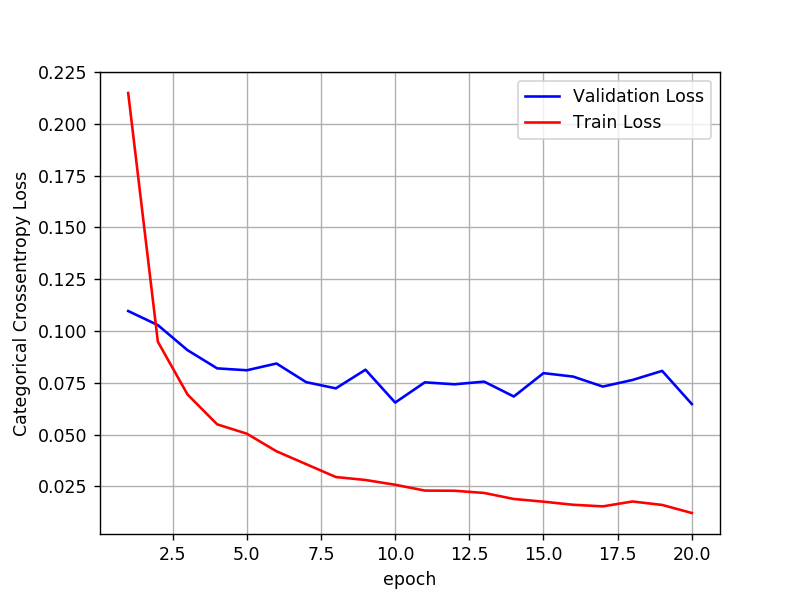

In [70]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')  
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##### for dropout rate = .5

In [71]:
model_batch = Sequential()
from keras.layers.normalization import BatchNormalization
# 1st layer

model_batch.add(Dense(512,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0,stddev = .039,seed= None)))
model_batch.add(Dropout(.5))

# 2nd layer
model_batch.add(Dense(256,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(Dropout(.5))

#3rd layer
model_batch.add(Dense(128,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(Dropout(.5))

# 4th layer

model_batch.add(Dense(128,activation = 'relu',input_shape = (input_dim,), kernel_initializer = RandomNormal(mean = 0.0,stddev = .039,seed = None)))
model_batch.add(Dropout(.5))

#5th layer

model_batch.add(Dense(56,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(Dropout(.5))

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 128)               16512     
__________

In [72]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.8772 - acc: 0.7126 - val_loss: 0.2144 - val_acc: 0.9429
Epoch 2/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.3317 - acc: 0.9223 - val_loss: 0.1719 - val_acc: 0.9559
Epoch 3/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.2602 - acc: 0.9410 - val_loss: 0.1418 - val_acc: 0.9648
Epoch 4/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.2277 - acc: 0.9486 - val_loss: 0.1362 - val_acc: 0.9673
Epoch 5/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2057 - acc: 0.9533 - val_loss: 0.1187 - val_acc: 0.9699
Epoch 6/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.1926 - acc: 0.9565 - val_loss: 0.1116 - val_acc: 0.9727
Epoch 7/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1682 - acc: 0.9613 - val_loss: 0.1089 -

Test score: 0.0943443350777945
Test accuracy: 0.9803


<IPython.core.display.Javascript object>


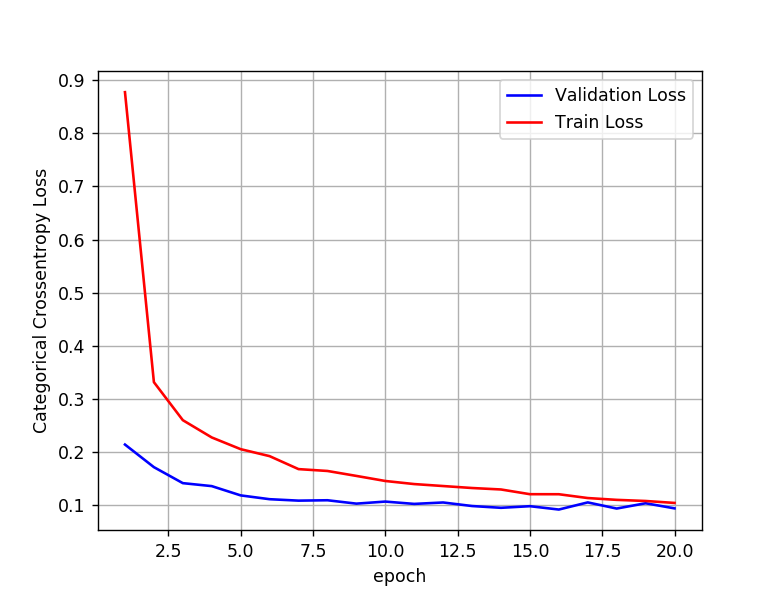

In [73]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')  
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [80]:
model_batch = Sequential()
from keras.layers.normalization import BatchNormalization
# 1st layer

model_batch.add(Dense(512,activation = 'sigmoid',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0,stddev = .039,seed= None)))
model_batch.add(BatchNormalization())

# 2nd layer
model_batch.add(Dense(256,activation = 'sigmoid',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(BatchNormalization())

#3rd layer
model_batch.add(Dense(128,activation = 'sigmoid',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(BatchNormalization())

# 4th layer

model_batch.add(Dense(128,activation = 'sigmoid',input_shape = (input_dim,), kernel_initializer = RandomNormal(mean = 0.0,stddev = .039,seed = None)))
model_batch.add(BatchNormalization())

#5th layer

model_batch.add(Dense(56,activation = 'sigmoid',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean= 0.0,stddev = .039,seed = None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
dense_94 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
dense_95 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512       
_________________________________________________________________
dense_96 (Dense)             (None, 128)               16512     
__________

In [81]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.2952 - acc: 0.9116 - val_loss: 0.1964 - val_acc: 0.9376
Epoch 2/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.1430 - acc: 0.9561 - val_loss: 0.1330 - val_acc: 0.9593
Epoch 3/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0972 - acc: 0.9706 - val_loss: 0.1078 - val_acc: 0.9654
Epoch 4/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0753 - acc: 0.9761 - val_loss: 0.1433 - val_acc: 0.9560
Epoch 5/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0610 - acc: 0.9800 - val_loss: 0.0947 - val_acc: 0.9697
Epoch 6/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0499 - acc: 0.9839 - val_loss: 0.0822 - val_acc: 0.9754
Epoch 7/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0429 - acc: 0.9860 - val_loss: 0.0

Test score: 0.08930665726301959
Test accuracy: 0.9793


<IPython.core.display.Javascript object>


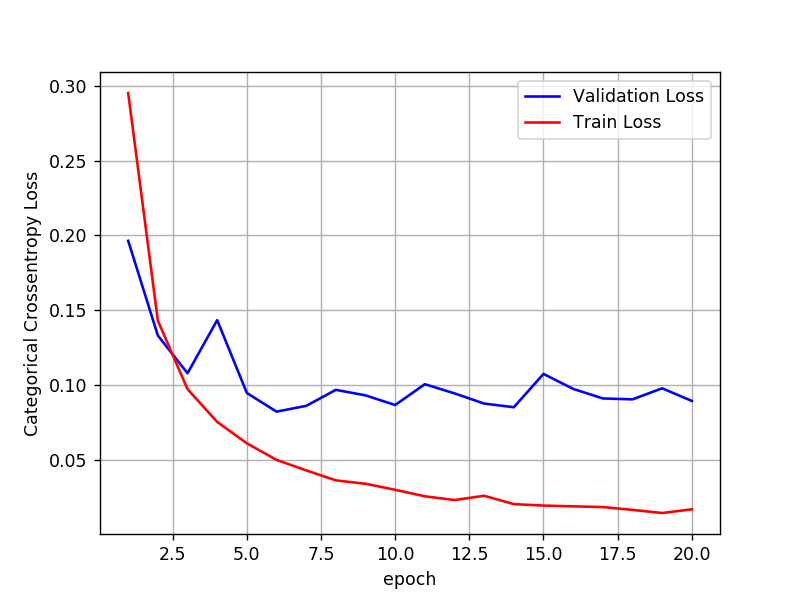

In [82]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')  
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [88]:
from prettytable import PrettyTable
x = PrettyTable()
print("For 2 layer architecture:")
x.field_names = (["1st_layer","2nd_layer","Reg","Test Score","Accuracy","Drop_Rate"])
x.add_row([256,256,'BatchNormalization',.1105,.9757,'_'])
x.add_row([256,256,'DropOut',.09127,.9791,.5])
x.add_row([256,256,'DropOut',.07188,.9818,.25])
print(x)

x1 = PrettyTable()
x1.field_names = (["1st_layer","2nd_layer","3rd layer","Reg","Test Score","Accuracy","Drop_Rate"])
x1.add_row([512,256,128,'DropOut',.0699,.9823,.5])
x1.add_row([512,256,128,'DropOut',.07066,.9833,.25])
x1.add_row([512,256,128,'BatchNor',.07659,.9816,'_'])
print(x1)

x1 = PrettyTable()
x1.field_names = (["1st_layer","2nd_layer","3rd layer","4th layer","5th layer","Reg","Test Score","Accuracy","Drop_Rate"])
x1.add_row([512,256,128,128,56,'Batch',.06472,.9828,'_'])
x1.add_row([512,256,128,128,56,'DropOut',.09434,.9803,.5])
x1.add_row([512,256,128,128,56,'BatchNor (sigmoid activation)',.08430,.9793,'_'])
print(x1)

For 2 layer architecture:
+-----------+-----------+--------------------+------------+----------+-----------+
| 1st_layer | 2nd_layer |        Reg         | Test Score | Accuracy | Drop_Rate |
+-----------+-----------+--------------------+------------+----------+-----------+
|    256    |    256    | BatchNormalization |   0.1105   |  0.9757  |     _     |
|    256    |    256    |      DropOut       |  0.09127   |  0.9791  |    0.5    |
|    256    |    256    |      DropOut       |  0.07188   |  0.9818  |    0.25   |
+-----------+-----------+--------------------+------------+----------+-----------+
+-----------+-----------+-----------+----------+------------+----------+-----------+
| 1st_layer | 2nd_layer | 3rd layer |   Reg    | Test Score | Accuracy | Drop_Rate |
+-----------+-----------+-----------+----------+------------+----------+-----------+
|    512    |    256    |    128    | DropOut  |   0.0699   |  0.9823  |    0.5    |
|    512    |    256    |    128    | DropOut  |  0.0

## Conclusions :

1. When we are reducing the drop out rate .5 to .25 our model's accuracy is increasing.
2. When we increase the number of layer, initially accuracy increases but for 5 layer again accuray starts decreasing.
3. We are getting maximum accuracy = .8833 for 3 layer MLP with drop out rate = .25.
4. As the number of epochs increases my model starts to overfitt.

#### steps taken
1. Define the architecture(define activation function, input shape, initialize kernel).
2. We are using different different architecture.
3. We are using BatchNormalization() and Dropout() with diff-diff value of Dropout() rate.